In [1174]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from collections import Counter

In [1175]:
# Wczytanie zbioru danych
dataset = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [1176]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Analizie danych zostanie podany zbiór przedstawiający informacje o tym czy pacient miał udar bądź nie, w zależności od kilku parametrów, które zostały opisane poniżej.

Opis atrybutów w zbiorze danych.

1) id: unikalny identyfikator

2) gender: „Mężczyzna”, „Kobieta” lub „Inne”

3) age: wiek pacjenta

4) hypertension: 0 jeśli pacjent nie ma nadciśnienia, 1 jeśli pacjent ma nadciśnienie

5) heart_disease: 0 jeśli pacjent nie ma żadnych chorób serca, 1 jeśli pacjent ma chorobę serca

6) ever_married: Czy pacjent kiedykolwiek był w związku małżeńskim „Nie” lub „Tak”

7) work_type: "children" - praca przy dziecach, "Govt_jov" - praca w spółce państwowej, "Never_worked" - nigdy nie pracował, "Private" - praca u osoby prywatnej or "Self-employed" - samo zatrudnienie

8) Residence_type: Rodzaj miejsca zamieszkania „Rural” - Wiejski lub „Urban” - Miejski

9) avg_glucose_level: średni poziom glukozy we krwi

10) bmi: wskaźnik masy ciała

11) smoking_status: "formerly smoked" - palił, "never smoked" - nigdy nie palił, "smokes" - pali or "Unknown" - brak informacji

12) stroke: 1 jeśli pacjent miał udar lub 0 jeśli nie


Sprawdzamy unikalne wartości dla kolumn w analizowanym zbiorze

In [1177]:
dataset.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Sprawdzamy liczbę danych w każdej kolumnie

In [1178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


Usuwamy niepotrzebną kolumnę "id", ponieważ może wpłynąć na analizę danych

In [1179]:
dataset.drop("id", axis=1, inplace=True)

Kolumna "bmi" posiada puste wartości, najlepszym sposobem na wyeliminowanie pustych wartości jest obliczenie średniego bmi u kobiet i mężczyzn i uzupełnienie pustych rekordów odpowiednią średnią wartością w zależności od płci.

In [1180]:
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Sprawdzenie średniege BMI dla każdej z płci.

<AxesSubplot:title={'center':'bmi'}, xlabel='gender'>

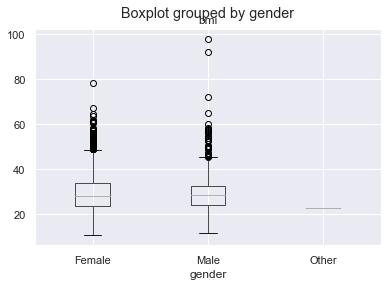

In [1181]:
dataset.boxplot(column="bmi", by = "gender")

In [1182]:
mean_bmi_male = np.mean(dataset[dataset['gender'] == 'Male']['bmi'])
mean_bmi_female = np.mean(dataset[dataset['gender'] == 'Female']['bmi'])
mean_bmi = np.mean(dataset['bmi'])

print("Średnie BMI u kobiet: ", mean_bmi_female)
print("Średnie BMI u mężczyzn: ", mean_bmi_male)
print("Średnie BMI w zbiorze: ", mean_bmi)

Średnie BMI u kobiet:  29.065757680358992
Średnie BMI u mężczyzn:  28.64793635007459
Średnie BMI w zbiorze:  28.893236911794666


In [1183]:
# Uzpełnienie pustych wartości zerami w celu łatwego uzpełnienia danych
dataset['bmi'] = dataset['bmi'].fillna(0)

In [1184]:
# Uzpełnienie brakujących wartości dla danej płci, średnimi wartościami
dataset_row_count = dataset.shape[0]
for i in range(0,dataset_row_count):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.64793635007459
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.065757680358992
        else:
            dataset['bmi'][i] = 28.893236911794666

<ipython-input-1184-fd262a8f50cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['bmi'][i] = 29.065757680358992
<ipython-input-1184-fd262a8f50cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['bmi'][i] = 28.64793635007459


In [1185]:
# Sprawdzenie czy w zbiorze dla kolumny "BMI" dalej występują wartości puste
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Sprawdzenie unikalnych wartości dla danych kategorycznych

In [1186]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

for c in categorical_variables:
    print("Unikalne wartości dla {} =".format(c), dataset[c].unique())

Unikalne wartości dla gender = ['Male' 'Female' 'Other']
Unikalne wartości dla ever_married = ['Yes' 'No']
Unikalne wartości dla work_type = ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unikalne wartości dla Residence_type = ['Urban' 'Rural']
Unikalne wartości dla smoking_status = ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Analiza danych przy pomocy wykresów

In [1187]:
# Ustawienie tła dla wykresów w celu przejrzystości prezentowania danych
sns.set_style('darkgrid')

In [1188]:
# Funkcja do wykresu słupkowego
def bar_plot(variable):
    var = dataset[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

Pobieramy wszystkie cechy o typie łańcuchowym do listy, a wygenerować dla ich wykresy w celu analizy danych.

In [1189]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


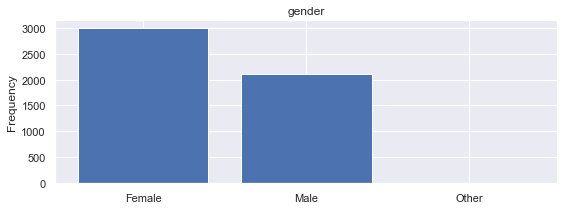

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


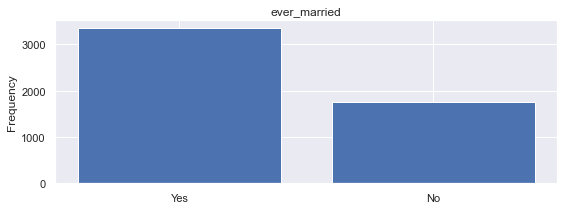

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


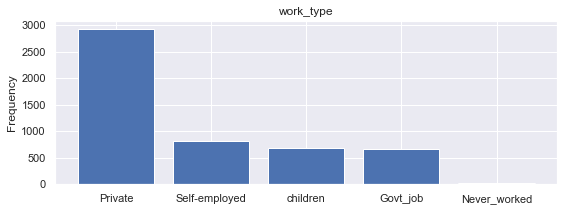

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


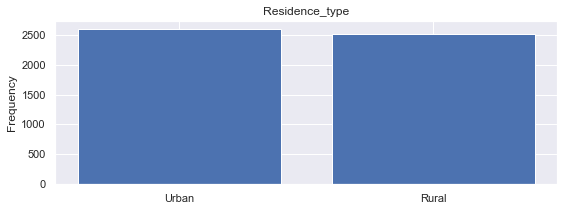

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


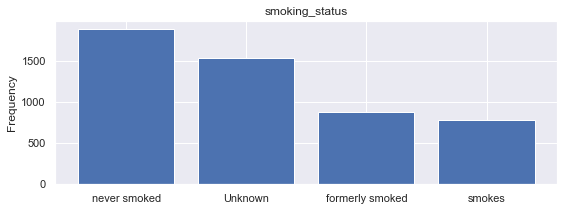

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [1190]:
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

Tą samą operację wykonujemy dla cech o typie numerycznym.

In [1191]:
# Funkcja do prezentacji histogramu
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
    

In [1192]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


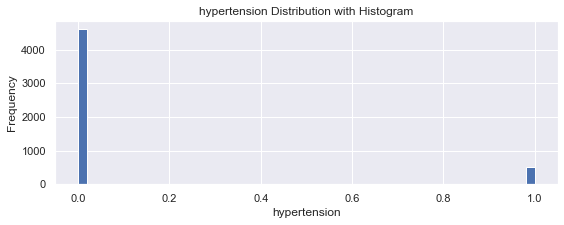

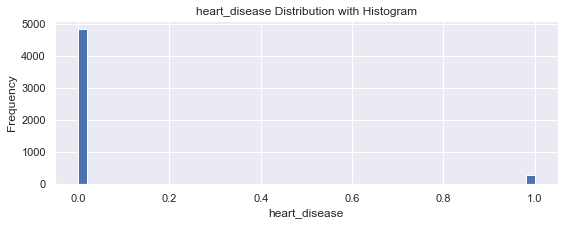

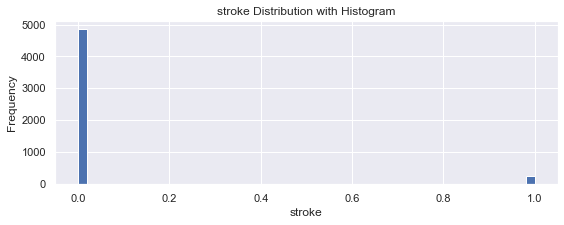

In [1193]:
for n in numerical_int64_list:
    plot_hist(n)

In [1194]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


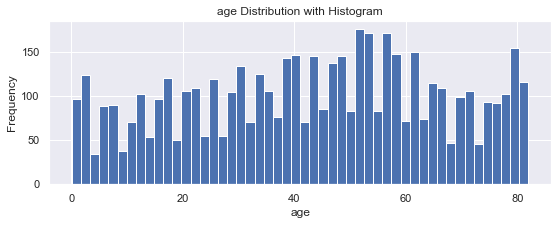

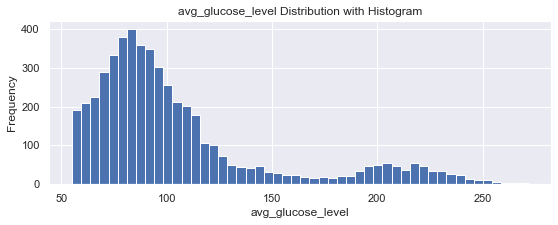

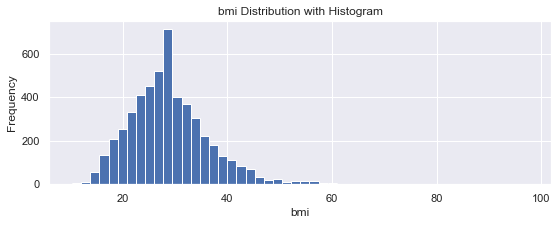

In [1195]:
for n in numerical_float64_list:
    plot_hist(n)

Sprawdzamy jak wyglądają statystyki udaru w zależności od płci.

In [1196]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


Text(0.5, 1.0, "Dystrybucja próbek dla cechy 'gender'")

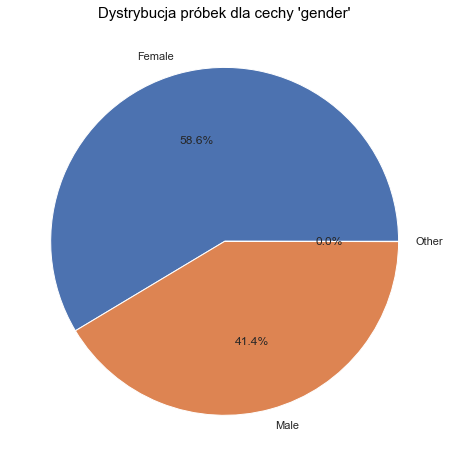

In [1197]:
labels = dataset['gender'].value_counts().index
sizes = dataset['gender'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Dystrybucja próbek dla cechy 'gender'",color = 'black',fontsize = 15)

Sprawdzamy jak wyglądają statystyki udaru w zależności od bycia w związku małżeńskim.

In [1198]:
dataset[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,ever_married,stroke
1,Yes,0.065613
0,No,0.016505


Text(0.5, 1.0, "Dystrybucja próbek dla cechy 'ever_married'")

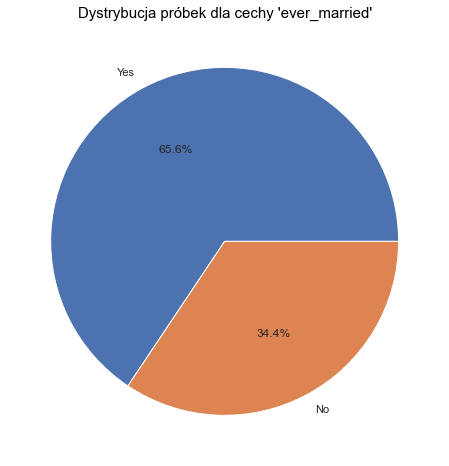

In [1199]:
labels = dataset['ever_married'].value_counts().index
sizes = dataset['ever_married'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Dystrybucja próbek dla cechy 'ever_married'",color = 'black',fontsize = 15)

Sprawdzamy jak wyglądają statystyki udaru w zależności od typu podejmowanej pracy.

In [1200]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


In [1201]:
dataset[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)

,work_type,stroke
2,Private,2925
3,Self-employed,819
4,children,687
0,Govt_job,657
1,Never_worked,22


Text(0.5, 1.0, "Dystrybucja próbek dla cechy 'work_type'")

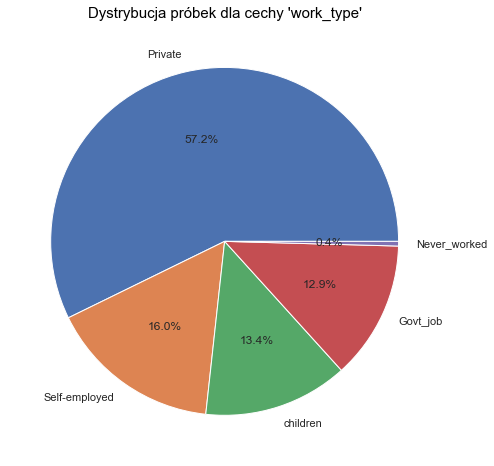

In [1202]:
labels = dataset['work_type'].value_counts().index
sizes = dataset['work_type'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Dystrybucja próbek dla cechy 'work_type'",color = 'black',fontsize = 15)

Sprawdzamy jak wyglądają statystyki udaru w zależności od miejsca zamieszkania.

In [1203]:
dataset[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,Residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


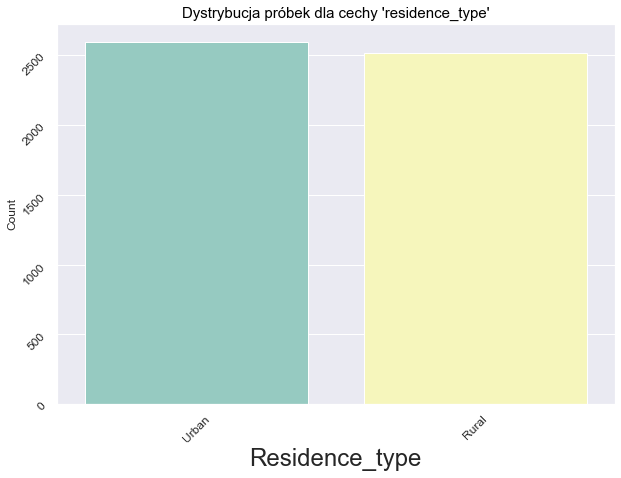

In [1204]:
counts = dataset['Residence_type'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Count')
plt.xlabel('Residence_type', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title("Dystrybucja próbek dla cechy 'residence_type'",color = 'black',fontsize=15)
plt.show()

Sprawdzamy jak wyglądają statystyki udaru w zależności od tego czy osobą pali papierosy czy nie.

In [1205]:
dataset[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).mean().sort_values(by="stroke",ascending = False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


Text(0.5, 1.0, "Dystrybucja próbek dla cechy 'smoking_status'")

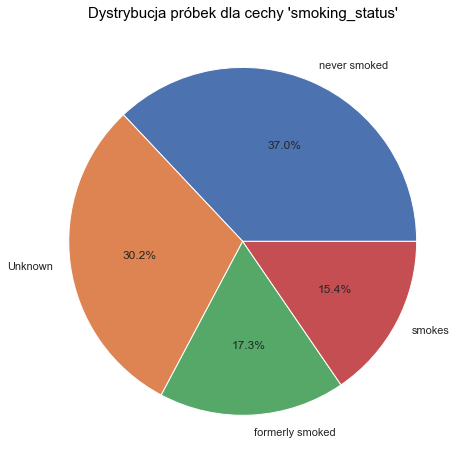

In [1206]:
labels = dataset['smoking_status'].value_counts().index
sizes = dataset['smoking_status'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Dystrybucja próbek dla cechy 'smoking_status'",color = 'black',fontsize = 15)

Korelacje atrybutów w zbiorze wyglądają następująco:

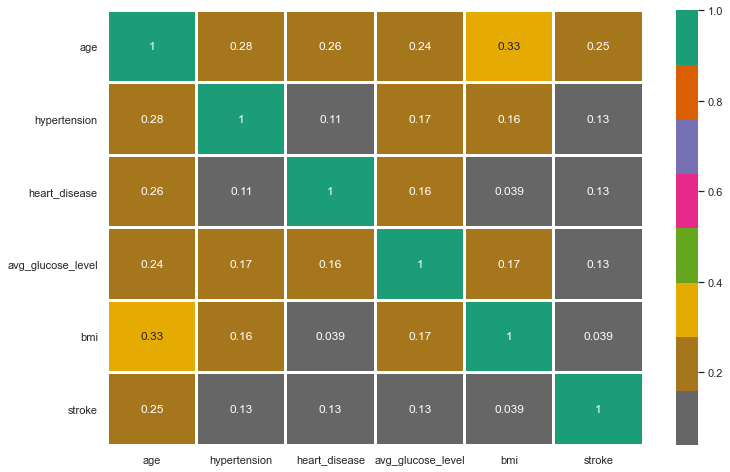

In [1207]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Wykrwyanie wartości odstających w zbiorze.
Obserwacje odstające mogą odzwierciedlać rzeczywisty rozkład lub być rezultatem przypadku, ale mogą świadczyć też o błędnym pomiarze czy pomyłkach we wprowadzaniu informacji do bazy danych, itp. Dlatego też zostanie dokonana analiza zbioru i dane odstające zostaną usunięte.

In [1208]:
# Funkcja do wykrywania wartości odstających
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [1209]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,28.647936,Unknown,1
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.200000,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.500000,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
35,Female,82.0,1,1,No,Private,Rural,84.03,26.500000,formerly smoked,1
143,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.800000,never smoked,1
171,Female,79.0,1,1,No,Self-employed,Rural,60.94,29.065758,never smoked,1


Na tym etapie rozpoczeniemy analizę zbioru za pomocą algorytmów uczenia maszynowego. Sprawdzimy kilka różnych algorytmów, ale w pierwszej kolejności trzeba sprawdzić czy w zbiorze nie ma wartości odstających, które mogą zaburzyć model i wpłynąć nagatywanie na korelację między atrybutami. Kolejno zostaną zakodowane dane łańcuchowe, ponieważ, niektóre algorytmy uczenia maszynowego nie są w stanie operować na takich typach danych. Każdej z wartości unikalnej, dla atrybutu kategorycznego zostaną przypisane wartości liczbowe. Dodatkowo dla kolumn, które posiadają w kolumnie więcej niż 3 wartości łańcuchowe wykorzytamy technikę kodowania binarnego dla tych wartości.

Usuwamy wartości odstąjące z zbioru danych.

In [1210]:
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)

In [1211]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
4,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5018,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
5019,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5020,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5021,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Kodowanie wartości/etykiet

In [1212]:
ever_married_mapping = {'No': 0, 'Yes': 1}
dataset['ever_married'] = dataset['ever_married'].map(ever_married_mapping)

In [1213]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
dataset['Residence_type'] = dataset['Residence_type'].map(Residence_type_mapping)

In [1214]:
dataset['gender'] = pd.Categorical(dataset['gender'])
datasetDummies_gender = pd.get_dummies(dataset['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
5018,1,0,0
5019,1,0,0
5020,1,0,0
5021,0,1,0


In [1215]:
dataset['work_type'] = pd.Categorical(dataset['work_type'])
datasetDummies_work_type = pd.get_dummies(dataset['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
5018,0,0,1,0,0
5019,0,0,0,1,0
5020,0,0,0,1,0
5021,0,0,1,0,0


In [1216]:
dataset['smoking_status'] = pd.Categorical(dataset['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(dataset['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5018,0,0,1,0
5019,0,0,1,0
5020,0,0,1,0
5021,0,1,0,0


In [1217]:
dataset.drop("gender", axis=1, inplace=True)
dataset.drop("work_type", axis=1, inplace=True)
dataset.drop("smoking_status", axis=1, inplace=True)

In [1218]:
dataset = pd.concat([dataset, datasetDummies_gender], axis=1)
dataset = pd.concat([dataset, datasetDummies_work_type], axis=1)
dataset = pd.concat([dataset, datasetDummies_smoking_status], axis=1)
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,61.0,0,0,1,0,202.21,29.065758,1,1,0,0,0,0,0,1,0,0,0,1,0
1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
2,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
3,81.0,0,0,1,1,186.21,29.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
4,69.0,0,0,0,1,94.39,22.800000,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,80.0,1,0,1,1,83.75,29.065758,0,1,0,0,0,0,1,0,0,0,0,1,0
5019,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5020,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5021,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


In [1219]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     5023 non-null   float64
 1   hypertension                            5023 non-null   int64  
 2   heart_disease                           5023 non-null   int64  
 3   ever_married                            5023 non-null   int64  
 4   Residence_type                          5023 non-null   int64  
 5   avg_glucose_level                       5023 non-null   float64
 6   bmi                                     5023 non-null   float64
 7   stroke                                  5023 non-null   int64  
 8   gender_encoded_Female                   5023 non-null   uint8  
 9   gender_encoded_Male                     5023 non-null   uint8  
 10  gender_encoded_Other                    5023 non-null   uint

In [1220]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender_encoded_Female',
 'gender_encoded_Male',
 'gender_encoded_Other',
 'work_type_encoded_Govt_job',
 'work_type_encoded_Never_worked',
 'work_type_encoded_Private',
 'work_type_encoded_Self-employed',
 'work_type_encoded_children',
 'smoking_status_encoded_Unknown',
 'smoking_status_encoded_formerly smoked',
 'smoking_status_encoded_never smoked',
 'smoking_status_encoded_smokes']

target = ['stroke']

X = dataset[features]
y = dataset[target]

In [1221]:
# Import bibliotek do uczenia maszynowego
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [1222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [1223]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1224]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

modelNames = ['GaussianNB', 'BernoulliNB', 'LogisticRegression','DecisionTreeClassifier', 'RandomForestClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train.values.ravel())
  score = model.score(X_valid, y_valid)

  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Wynik trenowania wytrenowanego modelu: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Wynik walidacji wytrenowanego modelu: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Wynik testu wytrenowanego modelu: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Macierz błędu: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Dokładność: {accuracy}')
  print(f'Precyzja: {precision}')
  print(f'Recall: {recall}')
  print(f'F1: {f1score}')
  print(f'Specyficzność: {specificity}')
  print("") 
  print(f'Raport klasyfikacji: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds)
  print('#' * 65)
  print("")
  print("")
  print("")

GaussianNB
Wynik trenowania wytrenowanego modelu: 28.915304606240717
Wynik walidacji wytrenowanego modelu: 95.29553679131485
Wynik testu wytrenowanego modelu: 27.503015681544028
 
Macierz błędu: 
[[193   0]
 [601  35]]

Dokładność: 0.2750301568154403
Precyzja: 1.0
Recall: 0.055031446540880505
F1: 0.10432190760059612
Specyficzność: 1.0

Raport klasyfikacji: 
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       193
           1       1.00      0.06      0.10       636

    accuracy                           0.28       829
   macro avg       0.62      0.53      0.25       829
weighted avg       0.82      0.28      0.17       829



#################################################################



BernoulliNB
Wynik trenowania wytrenowanego modelu: 96.13670133729569
Wynik walidacji wytrenowanego modelu: 94.57177322074789
Wynik testu wytrenowanego modelu: 95.41616405307599
 
Macierz błędu: 
[[791  35]
 [  3   0]]

Dokładność: 0.954161640

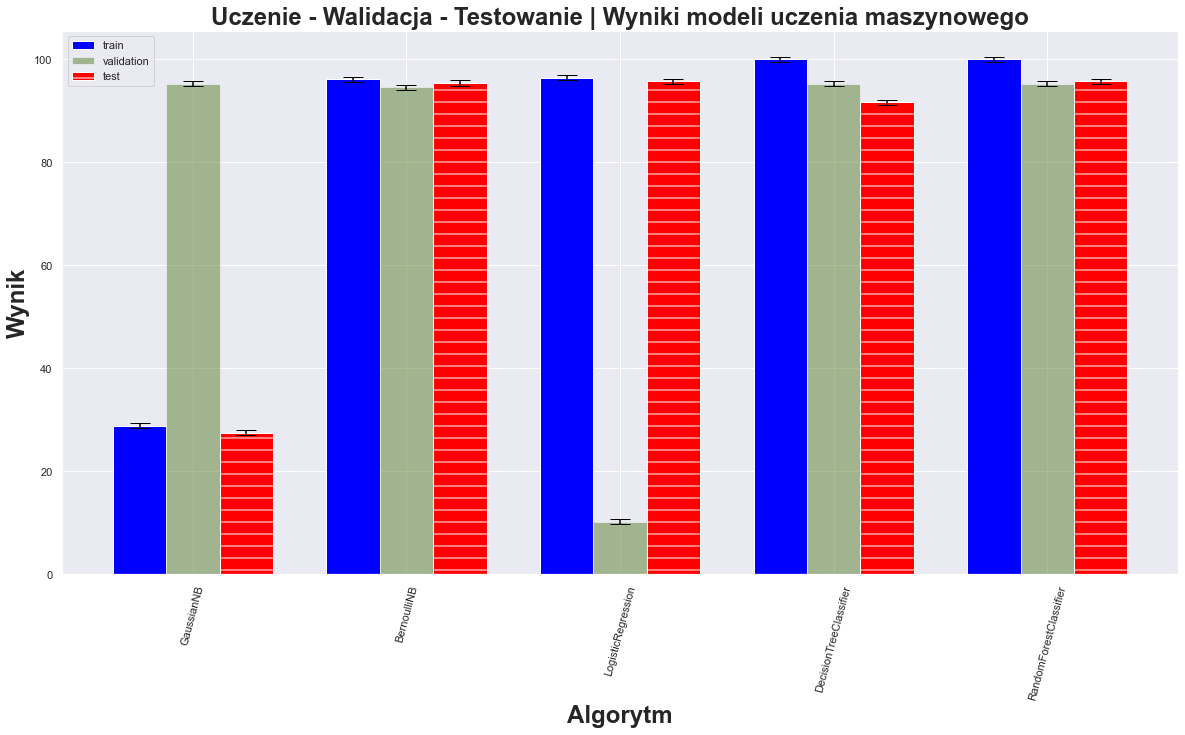

In [1225]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Uczenie - Walidacja - Testowanie | Wyniki modeli uczenia maszynowego', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ['GaussianNB', 'BernoulliNB', 'LogisticRegression','DecisionTreeClassifier', 'RandomForestClassifier']
    
plt.xlabel('Algorytm', fontweight='bold', size = 24)
plt.ylabel('Wynik', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [1226]:
for i in range(len(modelNames)):
    print(f'Dokładność algorytmu {modelNames[i]} wynosi: {testScores[i]}')

Dokładność algorytmu GaussianNB wynosi: 27.503015681544028
Dokładność algorytmu BernoulliNB wynosi: 95.41616405307599
Dokładność algorytmu LogisticRegression wynosi: 95.77804583835947
Dokładność algorytmu DecisionTreeClassifier wynosi: 91.6767189384801
Dokładność algorytmu RandomForestClassifier wynosi: 95.77804583835947


Z badanych algorytmów najlepiej wypadł algorytm RandomForestClassifier   

In [1227]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())

train_score = rf_model.score(X_train, y_train)
print(f'Wynik trenowania wytrenowanego modelu: {train_score}')

validation_score = rf_model.score(X_valid, y_valid)
print(f'Wynik walidacji wytrenowanego modelu: {validation_score}')

test_score = rf_model.score(X_test, y_test.values)
print(f'Wynik testu wytrenowanego modelu: {test_score}')

y_predictions = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Dokładność: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Macierz błędu: \n{conf_matrix}\n')

Wynik trenowania wytrenowanego modelu: 1.0
Wynik walidacji wytrenowanego modelu: 0.9529553679131484
Wynik testu wytrenowanego modelu: 0.9577804583835947
Dokładność: 95.77804583835947

Macierz błędu: 
[[794  35]
 [  0   0]]



Na wyrbanym modelu zastosujemy waliadację krzyżową polega ona na podziale próby statystycznej na podzbiory, a następnie przeprowadzaniu wszelkich analiz na zbiorze uczącym. Test ten pozwala bronić się przed tzw. błędem trzeciego rodzaju i właściwie ocenić trafność prognostyczną modelu predykcyjnego. Bez jej zastosowania nie można być pewnym, czy model będzie dobrze działał dla danych, które nie były wykorzystywane do jego konstruowania.

In [1228]:
cross_valid = cross_val_score(rf_model, X = X_train, y = y_train.values.ravel(), cv = 20)

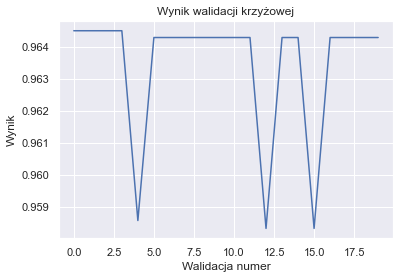

In [1229]:
plt.title("Wynik walidacji krzyżowej")
plt.xlabel("Walidacja numer")
plt.ylabel("Wynik")
plt.plot(cross_valid)

Wachania dokładności obliczeń nie są bardzo odstające i mieszczą się w odpowiednim zakresie.

Kolejno sprawdzimy jakie cechy mają największy wpływ na to czy ktoś będzie miał udar.

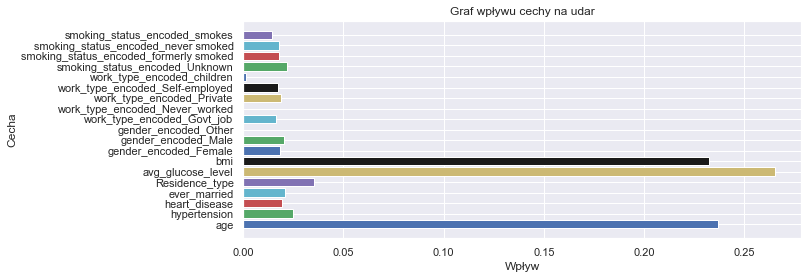

In [1230]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())

imp_feature = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Graf wpływu cechy na udar")
plt.xlabel("Wpływ")
plt.ylabel("Cecha")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.show()

Na podstawie wykonanej analizy zbioru można zauważyć, że w większej ilości udar wystąpił u 51% mężczyzn, mimo iż w zbiorze było więcej badanych kobiet. W 65% udar miały osoby, które kiedykolwiek były w związku, dodatkowo w 79% były to osoby samo zatrudnione. Udar miały w większym stopniu osoby zamieszkałe na obszarze miasta. Najczęściej udar wystąpił u osób, które rzuciły palenie papierosów (79%) lub aktualnie palą (53%). Najbardziej skorelowanymi cechami z udarem jest BMI i wiek. Po wykonanej analizie algorytmów uczenia maszynowego dla algorytmów: GaussianNB, BernoulliNB, LogisticRegression, DecisionTreeClassifier i RandomForestClassifier. RandomForestClassifier oraz LogisticRegression wypadł najlepiej, potem kolejno BernoulliNB, DecisionTreeClassifier, GaussianNB. Dla wykonanej walidacji krzyżowej dla algorytmu RandomForestClassifier wyniki nie odstawały w znaczący sposób, stąd można przypuszczać, że ten algorytm będzie odpowiedni do klasyfikacji. Najwięszy wpływ na klasyfikację w algorytmu uczącego ma cecha "avg_glucose_level" - średni poziom glukozy we krwi, potem kolejno "age" - wiek, bmi oraz "residence_type" rodzaj miejsca zamieszkania.